# Assignment 15 Random Forest (company data set)

Random Forest
 



About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & 
all other variable will be independent in the analysis.

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#Importing data set
company = pd.read_csv("E:\\EXCELR\\PARTH SIR\\inclass excercises\\datasets\\decision Tree\\Company_Data.csv",encoding='latin1')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.shape

(400, 11)

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# Data preprocessing

In [7]:
#Converting target variable in categorical variable
company["Sales"] = np.where(company['Sales']>8,'yes','no') 
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
#One Hot Encoding for categorical data
company1=pd.get_dummies(company,columns=['ShelveLoc'])
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,yes,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,yes,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,yes,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,no,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,no,141,64,3,340,128,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,33,14,Yes,Yes,0,1,0
396,no,139,23,3,37,120,55,11,No,Yes,0,0,1
397,no,162,26,12,368,159,40,18,Yes,Yes,0,0,1
398,no,100,79,7,284,95,50,12,Yes,Yes,1,0,0


In [9]:
company1.Sales.replace(('yes','no'),(1, 0),inplace=True)
company1.Urban.replace(('Yes','No'),(1, 0),inplace=True)
company1.US.replace(('Yes','No'),(1, 0),inplace=True)
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,138,73,11,276,120,42,17,1,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,0,1,0
2,1,113,35,10,269,80,59,12,1,1,0,0,1
3,0,117,100,4,466,97,55,14,1,1,0,0,1
4,0,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,1,1,0,1,0
396,0,139,23,3,37,120,55,11,0,1,0,0,1
397,0,162,26,12,368,159,40,18,1,1,0,0,1
398,0,100,79,7,284,95,50,12,1,1,1,0,0


In [10]:
company1.dtypes

Sales               int64
CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
Urban               int64
US                  int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
dtype: object

# Model Building 

In [11]:
X=pd.concat([company1.iloc[:,1:]])
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,0,1,0
396,139,23,3,37,120,55,11,0,1,0,0,1
397,162,26,12,368,159,40,18,1,1,0,0,1
398,100,79,7,284,95,50,12,1,1,1,0,0


In [12]:
Y=company1.iloc[:,0]
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [13]:
# Splitting data into training and testing data set
# seed = 7
# test_size = 0.33
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.33)

In [14]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=Y_train)

In [34]:
params = {}
params['learning_rate'] = 0.005
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 5

In [35]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 102, number of negative: 166
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380597 -> initscore=-0.487015
[LightGBM] [Info] Start training from score -0.487015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [36]:
#Prediction
y_pred=clf.predict(X_test)

In [37]:
predictions = [round(value) for value in y_pred]

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)

In [39]:
accuracy

0.5681818181818182

In [40]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(268, 12)
(132, 12)
(268,)
(132,)


# Model Training

In [41]:
#Random forest
#n_estimators:This is the no.of trees you want to build before taking the maximum voting or averages of predictions
rf_model=RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=5)

# Hyperparameter Tuning with GridSearchCV

In [42]:
grid_model = GridSearchCV(estimator = rf_model,param_grid = {'n_estimators' : [20,50,70,100],
                                                            'criterion' :['gini','entropy'],
                                                             'max_depth' :[2,3,5]})
grid_model.fit(X_train,Y_train)
print(grid_model.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}


In [43]:
rf_model1=RandomForestClassifier(criterion='entropy',n_estimators=50,max_depth=5)
rf_model1.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50)

# Model Testing

In [44]:
Y_train_pred=rf_model1.predict(X_train)
Y_train_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [45]:
Y_test_pred=rf_model1.predict(X_test)
Y_test_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

# Model Evaluation
Traning Data

In [46]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       166
           1       0.98      0.82      0.89       102

    accuracy                           0.93       268
   macro avg       0.94      0.91      0.92       268
weighted avg       0.93      0.93      0.92       268



In [47]:
print(confusion_matrix(Y_train,Y_train_pred))

[[164   2]
 [ 18  84]]


0.9057406094968108


Text(0, 0.5, 'True Positive Rate')

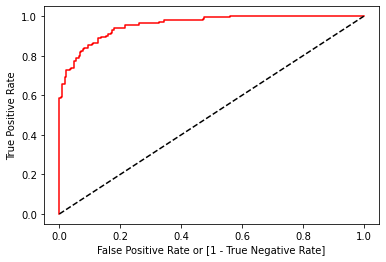

In [48]:
fpr, tpr, thresholds = roc_curve(Y,rf_model1.predict_proba (X)[:,1])
auc = roc_auc_score(Y_train,Y_train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='rf model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

Testing Data

In [49]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        70
           1       0.90      0.56      0.69        62

    accuracy                           0.77       132
   macro avg       0.80      0.75      0.75       132
weighted avg       0.80      0.77      0.75       132



In [50]:
print(confusion_matrix(Y_test,Y_test_pred))

[[66  4]
 [27 35]]


0.7536866359447004


Text(0, 0.5, 'True Positive Rate')

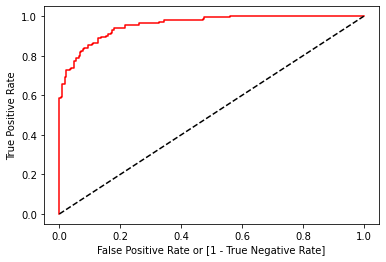

In [51]:
fpr, tpr, thresholds = roc_curve(Y,rf_model1.predict_proba (X)[:,1])
auc = roc_auc_score(Y_test,Y_test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='rf model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

Training accuracy- 93%

Testing accuracy- 77%